###  Tenemos 2 datasets de winequality uno para el vino rojo y otro para el vino blanco. La idea de este proyecto es realizar el proceso de extraccion y limpieza de datos, para finalmente hacer uso de 2 tareas predictoras.

####  La primera tarea sera de predecir la clase de vino segun caracteristicas por lo que se tendra que unir ambos dataset y ordenarlos aleatoriamente para evitar sesgos. Y La segunda sera predecir la calidad del vino segun caracteristicas como acidez, %alcohol, etc.

In [279]:
import pandas as pd

# Cargar datasets
red_wine = pd.read_csv('winequality-red.csv', delimiter=';') # aqui es ; ya que el dataset lo indica
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Explorar datasets
print("Red Wine Data:\n", red_wine.head())

Red Wine Data:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2   

In [240]:
print("White Wine Data:\n", white_wine.head())



White Wine Data:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2 

In [241]:
# Información de los datasets
print("Red Wine Info:\n", red_wine.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Red Wine Info:
 None


In [242]:
print("White Wine Info:\n", white_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
White Wine Info:
 None


In [243]:
# Estadísticas descriptivas
print("Estadísticas descriptivas del vino tinto:\n", red_wine.describe())

Estadísticas descriptivas del vino tinto:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min  

In [244]:
print("Estadísticas descriptivas del vino blanco:\n", white_wine.describe())

Estadísticas descriptivas del vino blanco:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min 

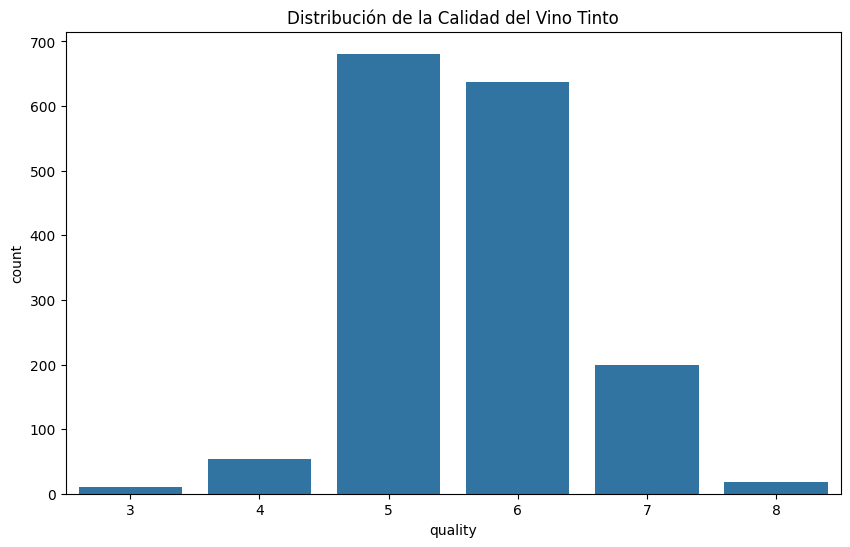

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la calidad del vino tinto
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=red_wine)
plt.title('Distribución de la Calidad del Vino Tinto')
plt.show()

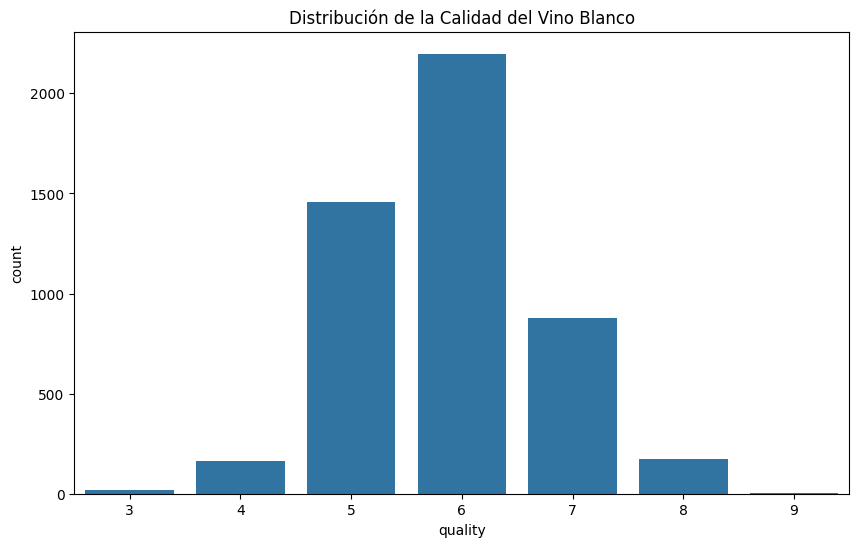

In [246]:
# Distribución de la calidad del vino blanco
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=white_wine)
plt.title('Distribución de la Calidad del Vino Blanco')
plt.show()

#### Como se observan existen muchos outliers. En primera instancia se podria pensar en eliminarlos pero aqui hay que tener en cuenta algo, las caracteristicas quimicas y fisicas de una mezcla pueden variar significativamente respecto a las condiciones y segun el dataset esta se midio integramente asi que se descartaria que hubo error de medicion y que aquellos datos no son significativos, lo segundo a tener en cuenta y viendo que los outliers son una parte significativa de los datos, no se optara por eliminarlos, pero en proceso posterior se analizara a detalle.

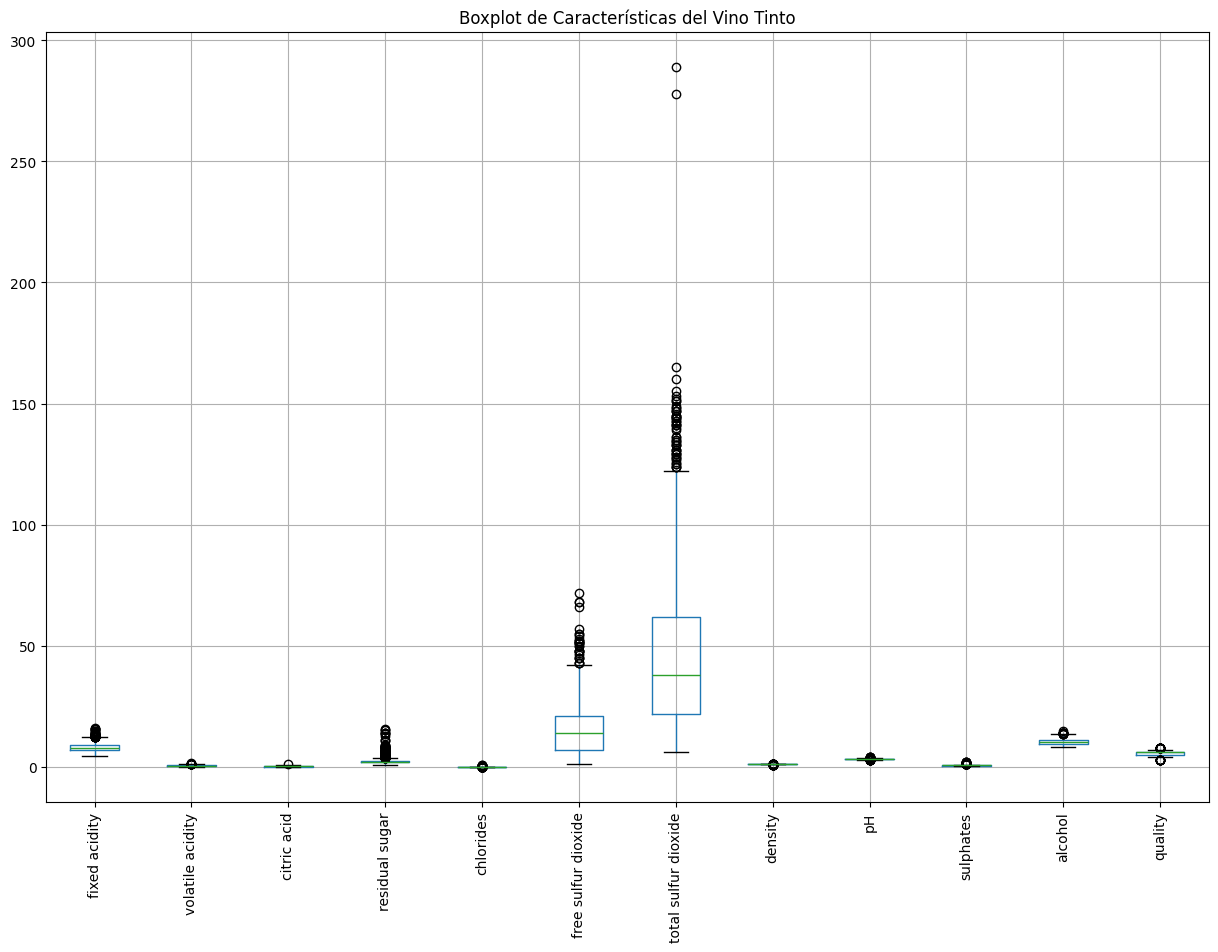

In [247]:
# Gráfico de caja para cada característica del vino tinto
plt.figure(figsize=(15, 10))
red_wine.boxplot(rot=90)
plt.title('Boxplot de Características del Vino Tinto')
plt.show()

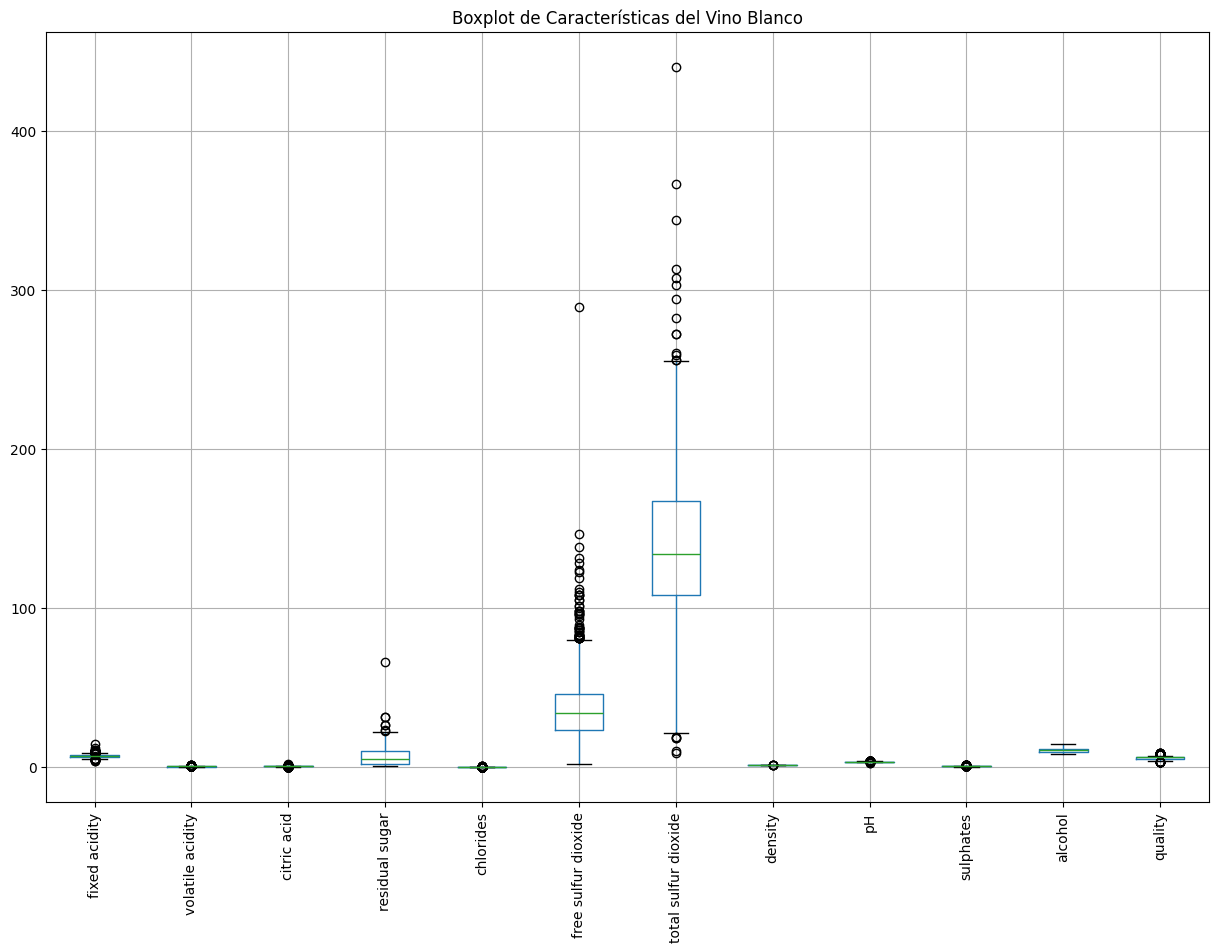

In [248]:
# Gráfico de caja para cada característica del vino blanco
plt.figure(figsize=(15, 10))
white_wine.boxplot(rot=90)
plt.title('Boxplot de Características del Vino Blanco')
plt.show()

#### Existe algunas variables con correlacion mayor a 0.6 sin embargo no es tan elevado como para considerar eliminar variables o considerar usar tecnicas de feature enginnering.

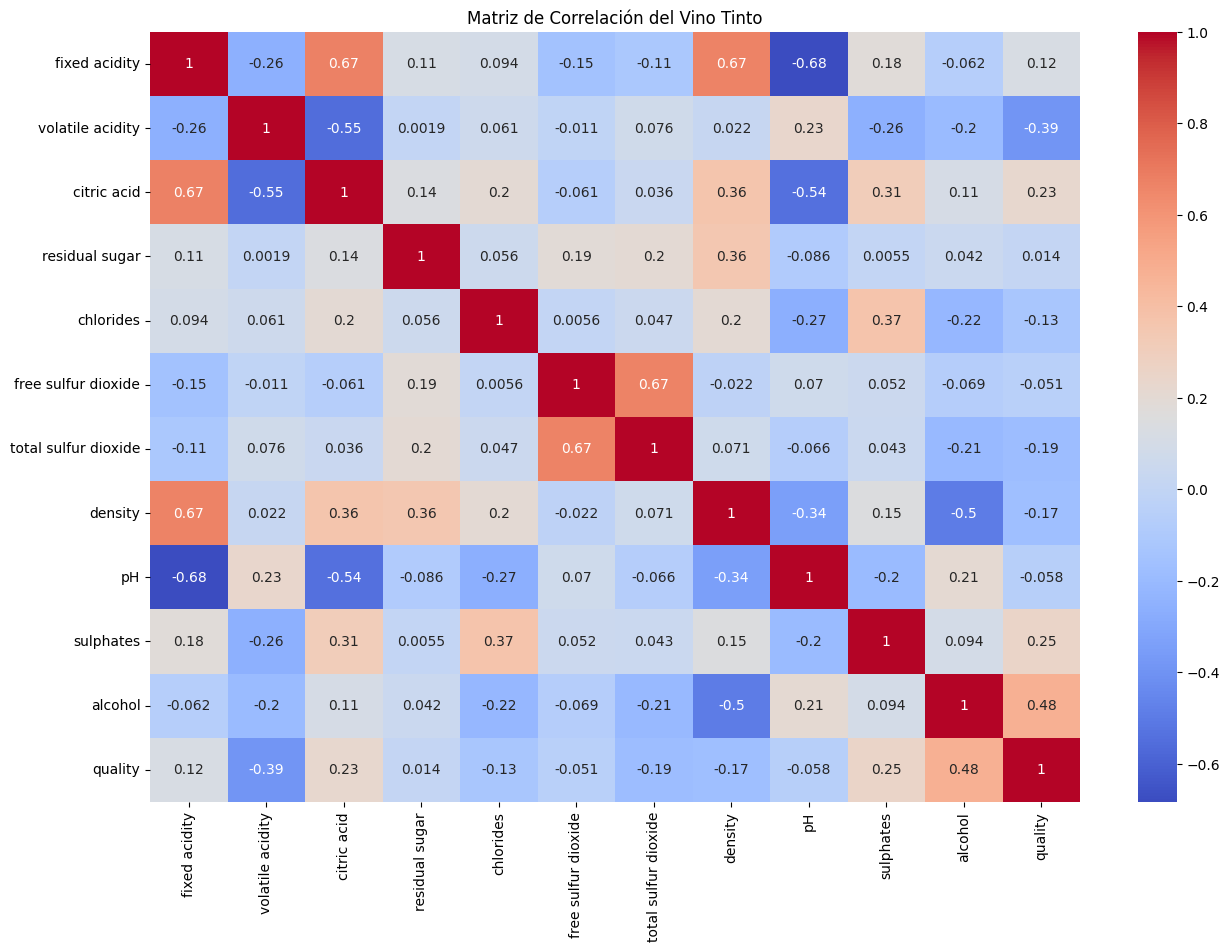

In [249]:
# Matriz de correlación del vino tinto
plt.figure(figsize=(15, 10))
sns.heatmap(red_wine.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación del Vino Tinto')
plt.show()


#### En el caso del vino blanco existe una correlacion mayor a 0.8 por lo que para la segunda tarea se considerara la eliminacion de 1 de las 2 variables para reducir costos de computacion o evitar colinealidad.

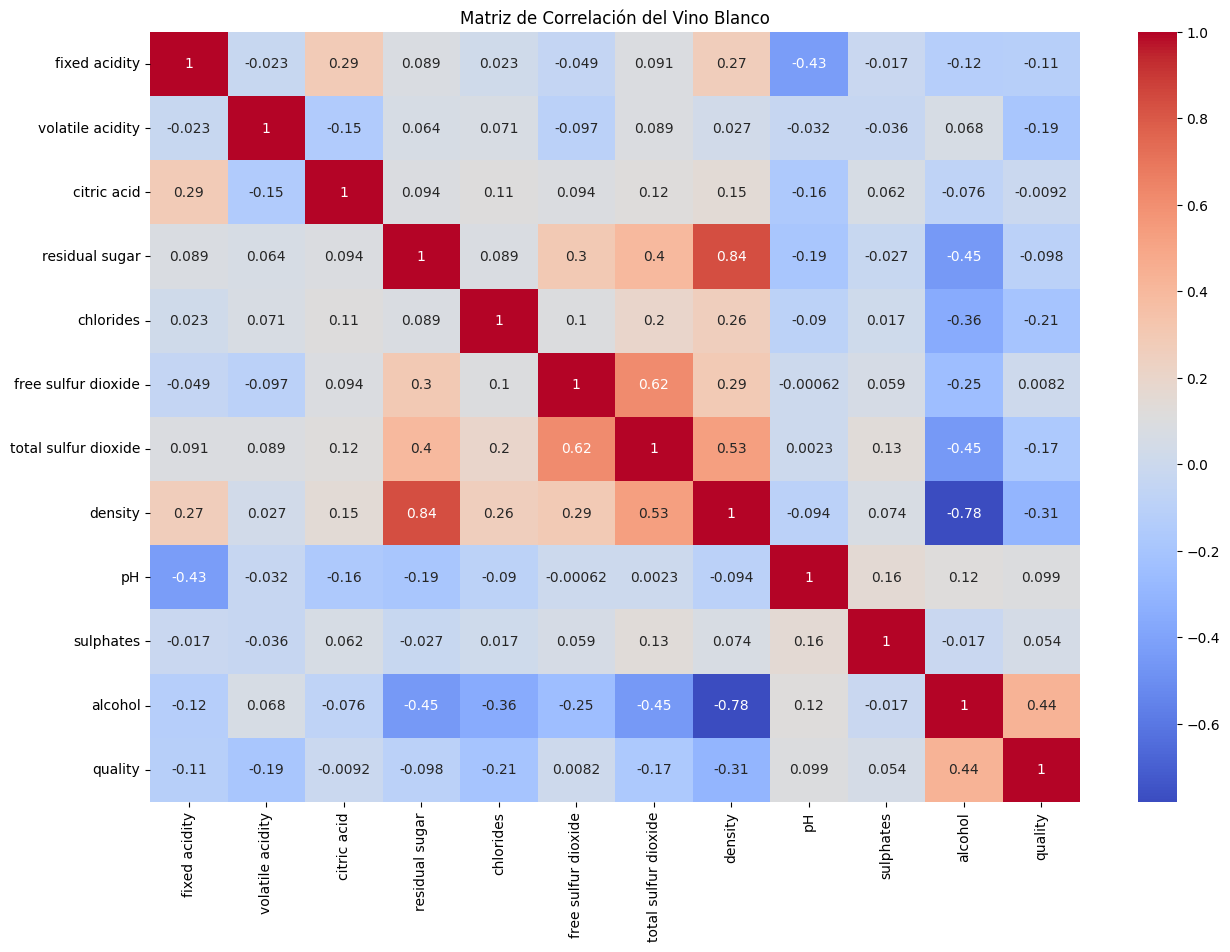

In [250]:
# Matriz de correlación del vino blanco
plt.figure(figsize=(15, 10))
sns.heatmap(white_wine.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación del Vino Blanco')
plt.show()

In [251]:
### Esta seria nuestra formula en caso los outlier 
### hubiesen sido pocos o se hubiese tratado de un error de medicion

#/ Q1 = red_wine.quantile(0.25)
# Q3 = red_wine.quantile(0.75)
# IQR = Q3 - Q1
# red_wine = red_wine[~((red_wine < (Q1 - 1.5 * IQR)) | (red_wine > (Q3 + 1.5 * IQR))).any(axis=1)]
# red_wine.info() 

#### OBSERVEMOS LA CAMPANA DE GAUSS PARA OBSERVAR LA DISTRIBUCION

##### CONCLUSIONES CAMPANAS DE GAUUS:
##### 1. La acidez volátil muestra una distribución bimodal, lo que puede indicar la presencia de dos subpoblaciones dentro del conjunto de datos de vino tinto.
##### 2.  Los valores ph, densidad, chlorides y residual sugar, tienen distribuciones aproximadamente normales, lo que es un buen indicativo de la calidad de los datos para estas variables.
##### 3. El resto de las variables presentan sesgo hacia la derecha e izquierda.

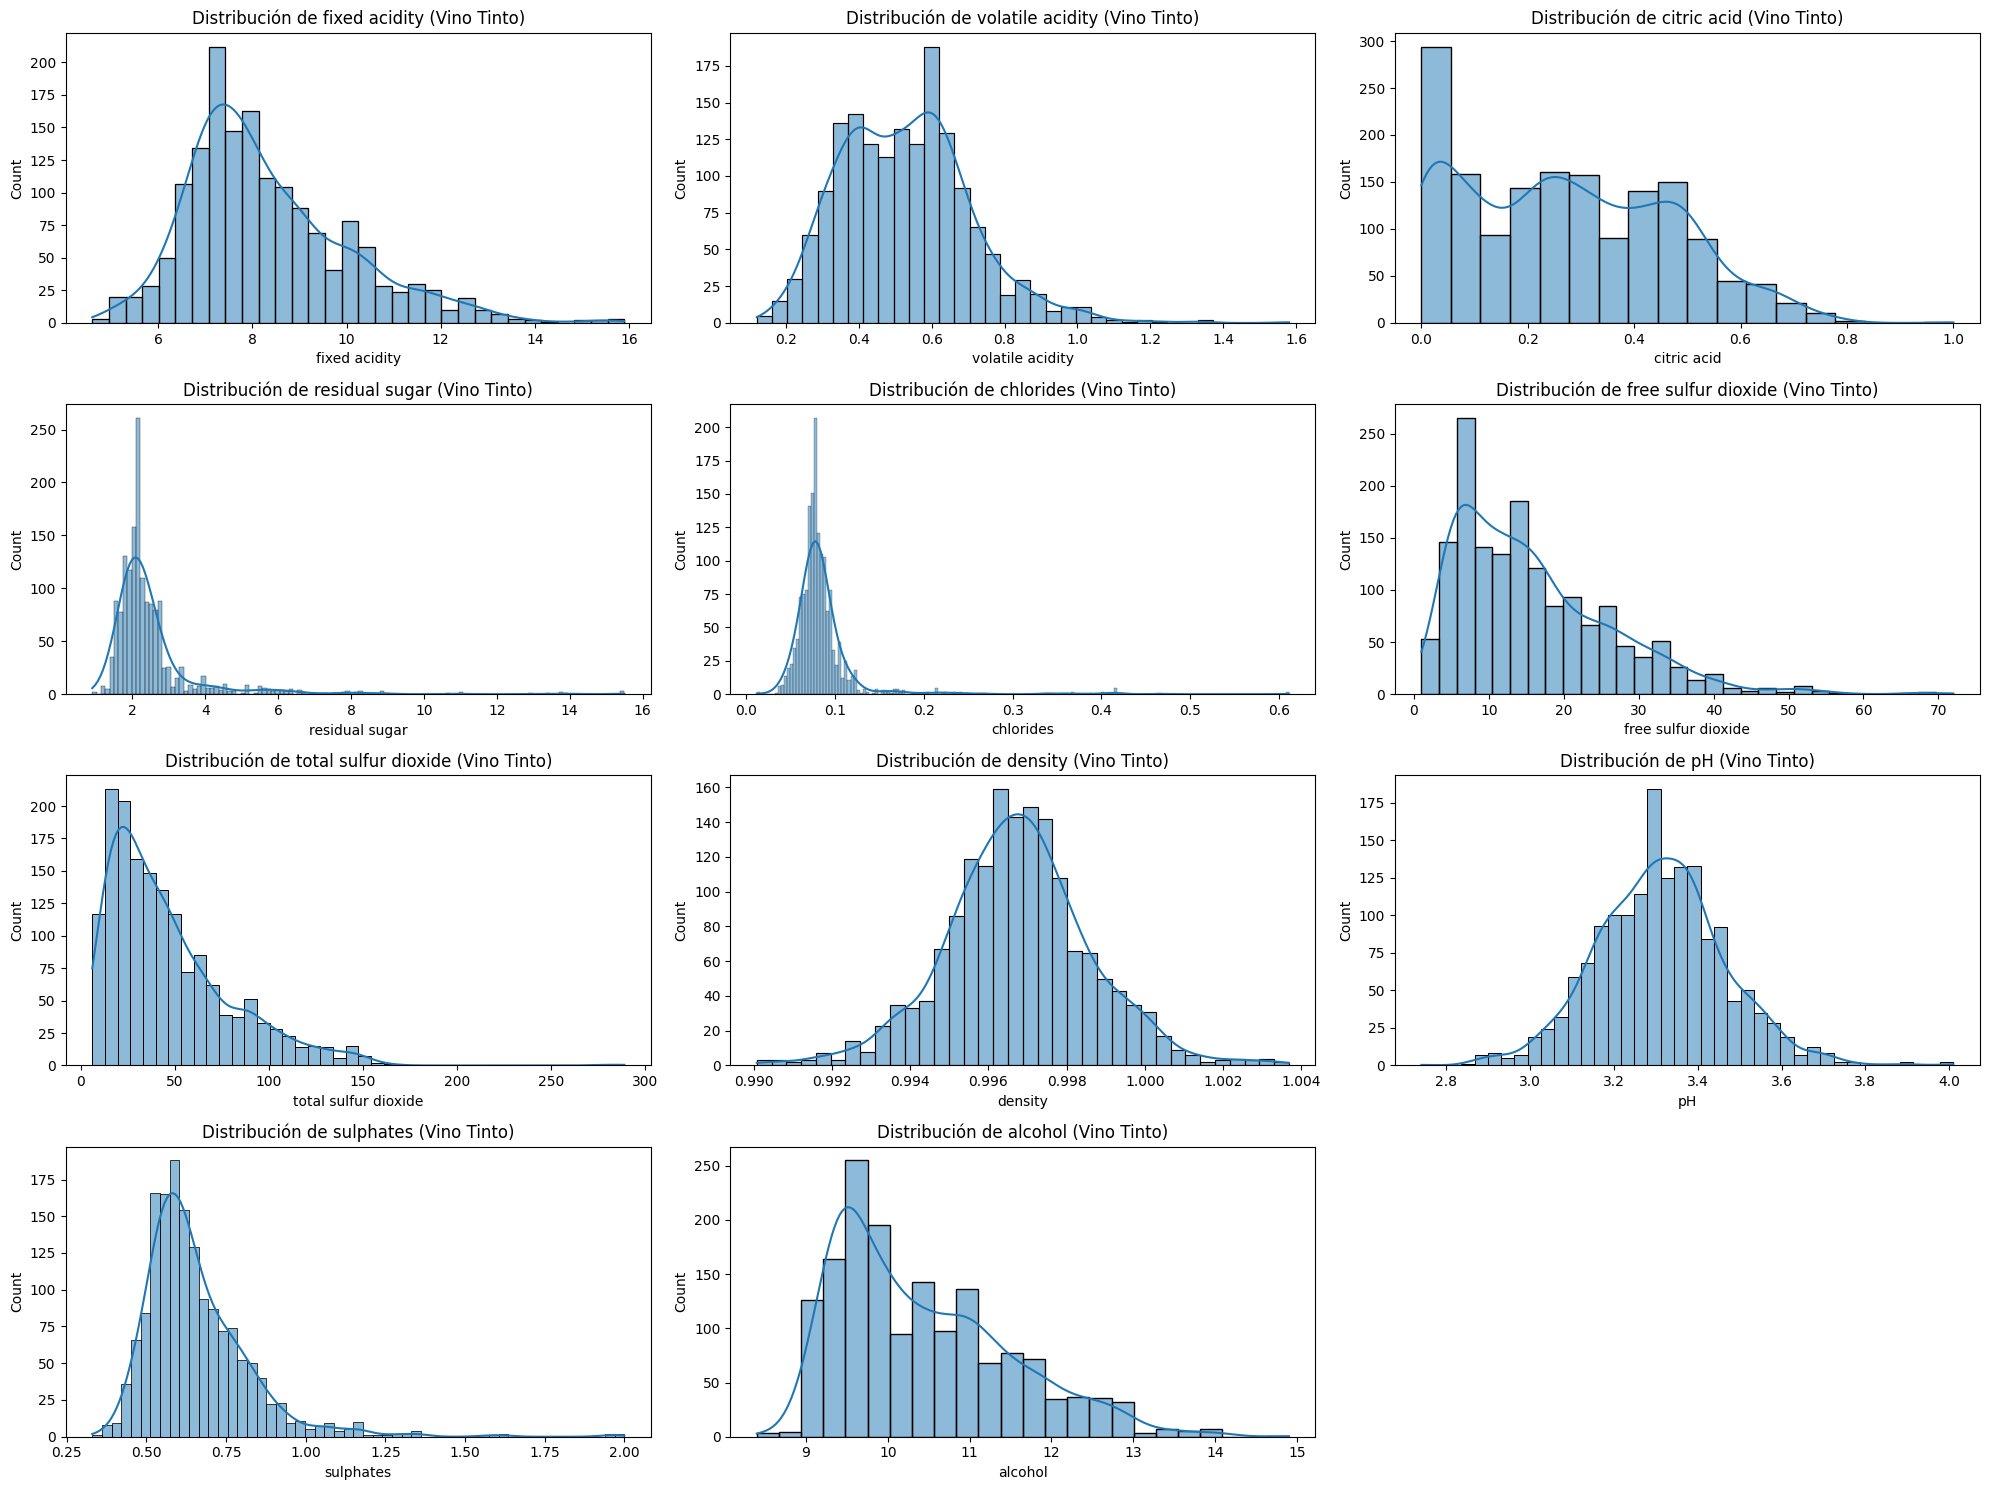

In [252]:
# Variables del dataset de vino tinto
features = red_wine.columns[:-1]  # Excluimos la columna 'quality'

# Crear gráficos de distribución
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(red_wine[feature], kde=True)
    plt.title(f'Distribución de {feature} (Vino Tinto)')
plt.tight_layout()
plt.show()

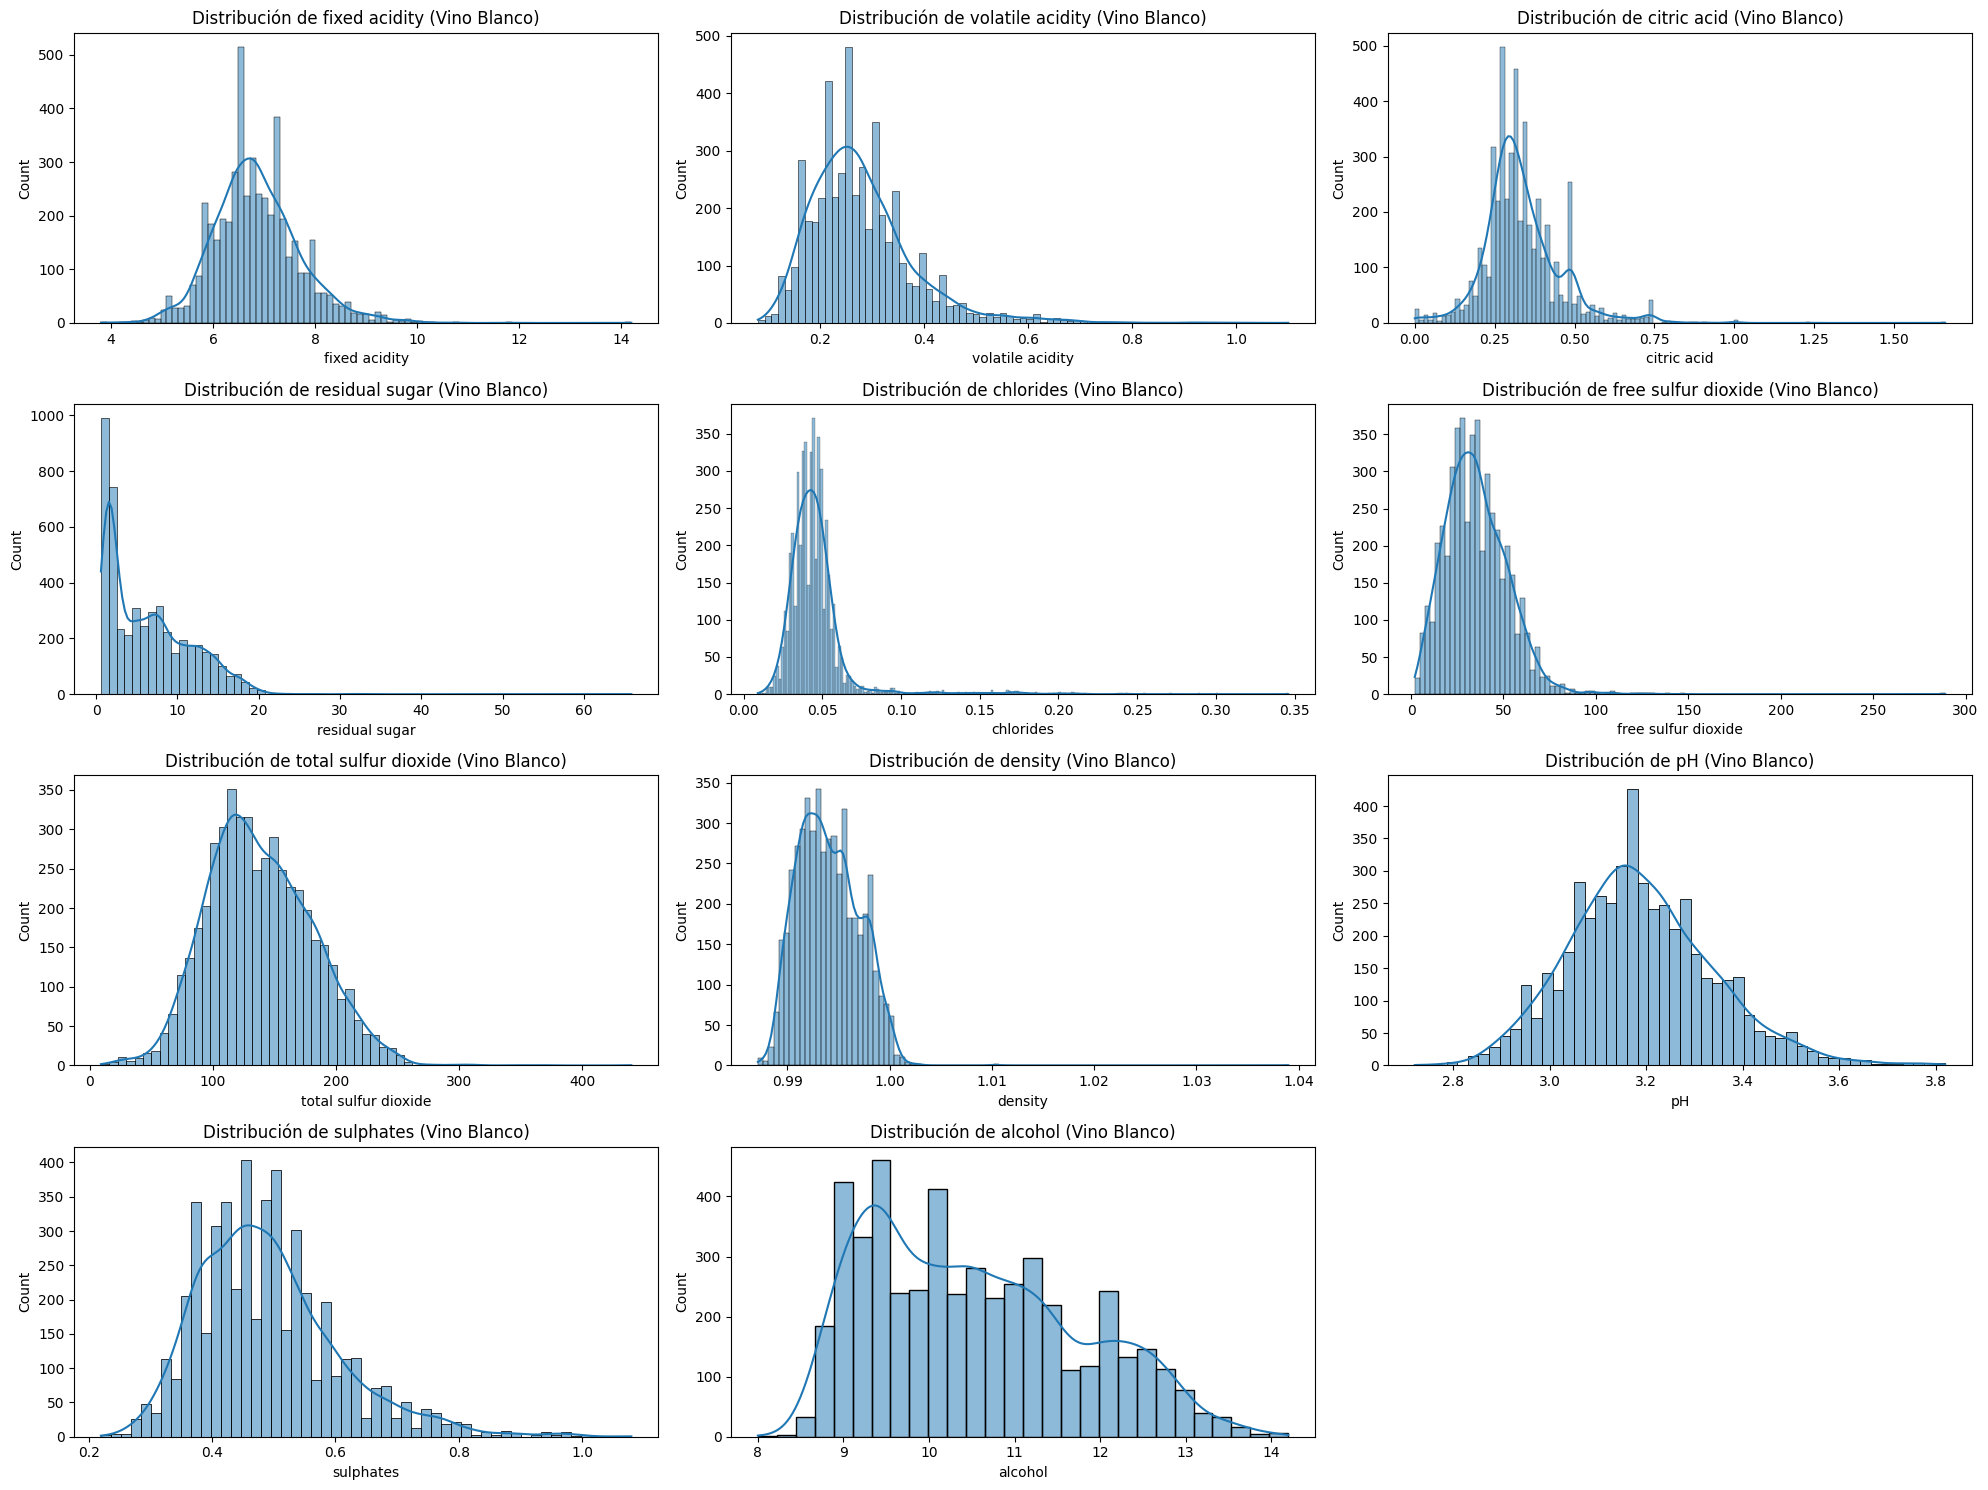

In [253]:
# Variables del dataset de vino blanco
features = white_wine.columns[:-1]  # Excluimos la columna 'quality'

# Crear gráficos de distribución
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(white_wine[feature], kde=True)
    plt.title(f'Distribución de {feature} (Vino Blanco)')
plt.tight_layout()
plt.show()

##### Para eliminar el sesgo de variables del vino tinto o rojo, que tienen algunas variables se usaran transformaciones como la logaritmica o cuadraticas, para atenuar y llegar a la normal

In [254]:
from scipy import stats
import numpy as np

In [255]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
# Aplicar transformaciones
red_wine['fixed_acidity_log'] = np.log1p(red_wine['fixed acidity'])
red_wine['volatile_acidity_log'] = np.log1p(red_wine['volatile acidity'])
red_wine['citric_acid_log'] = np.log1p(red_wine['citric acid'])
red_wine['residual_sugar_log'] = np.log1p(red_wine['residual sugar'])
red_wine['chlorides_log'] = np.log1p(red_wine['chlorides'])
red_wine['free_sulfur_dioxide_log'] = np.log1p(red_wine['free sulfur dioxide'])
red_wine['total_sulfur_dioxide_log'] = np.log1p(red_wine['total sulfur dioxide'])
red_wine['sulphates_log'] = np.log1p(red_wine['sulphates'])
red_wine['alcohol_log'] = np.log1p(red_wine['alcohol'])

# Aplicar transformaciones de raíz cuadrada para estad variables
red_wine['fixed_acidity_sqrt'] = np.sqrt(red_wine['fixed acidity'])
red_wine['volatile_acidity_sqrt'] = np.sqrt(red_wine['volatile acidity'])
red_wine['citric_acid_sqrt'] = np.sqrt(red_wine['citric acid'])
red_wine['residual_sugar_sqrt'] = np.sqrt(red_wine['residual sugar'])
red_wine['chlorides_sqrt'] = np.sqrt(red_wine['chlorides'])
red_wine['free_sulfur_dioxide_sqrt'] = np.sqrt(red_wine['free sulfur dioxide'])
red_wine['total_sulfur_dioxide_sqrt'] = np.sqrt(red_wine['total sulfur dioxide'])
red_wine['sulphates_sqrt'] = np.sqrt(red_wine['sulphates'])
red_wine['alcohol_sqrt'] = np.sqrt(red_wine['alcohol'])

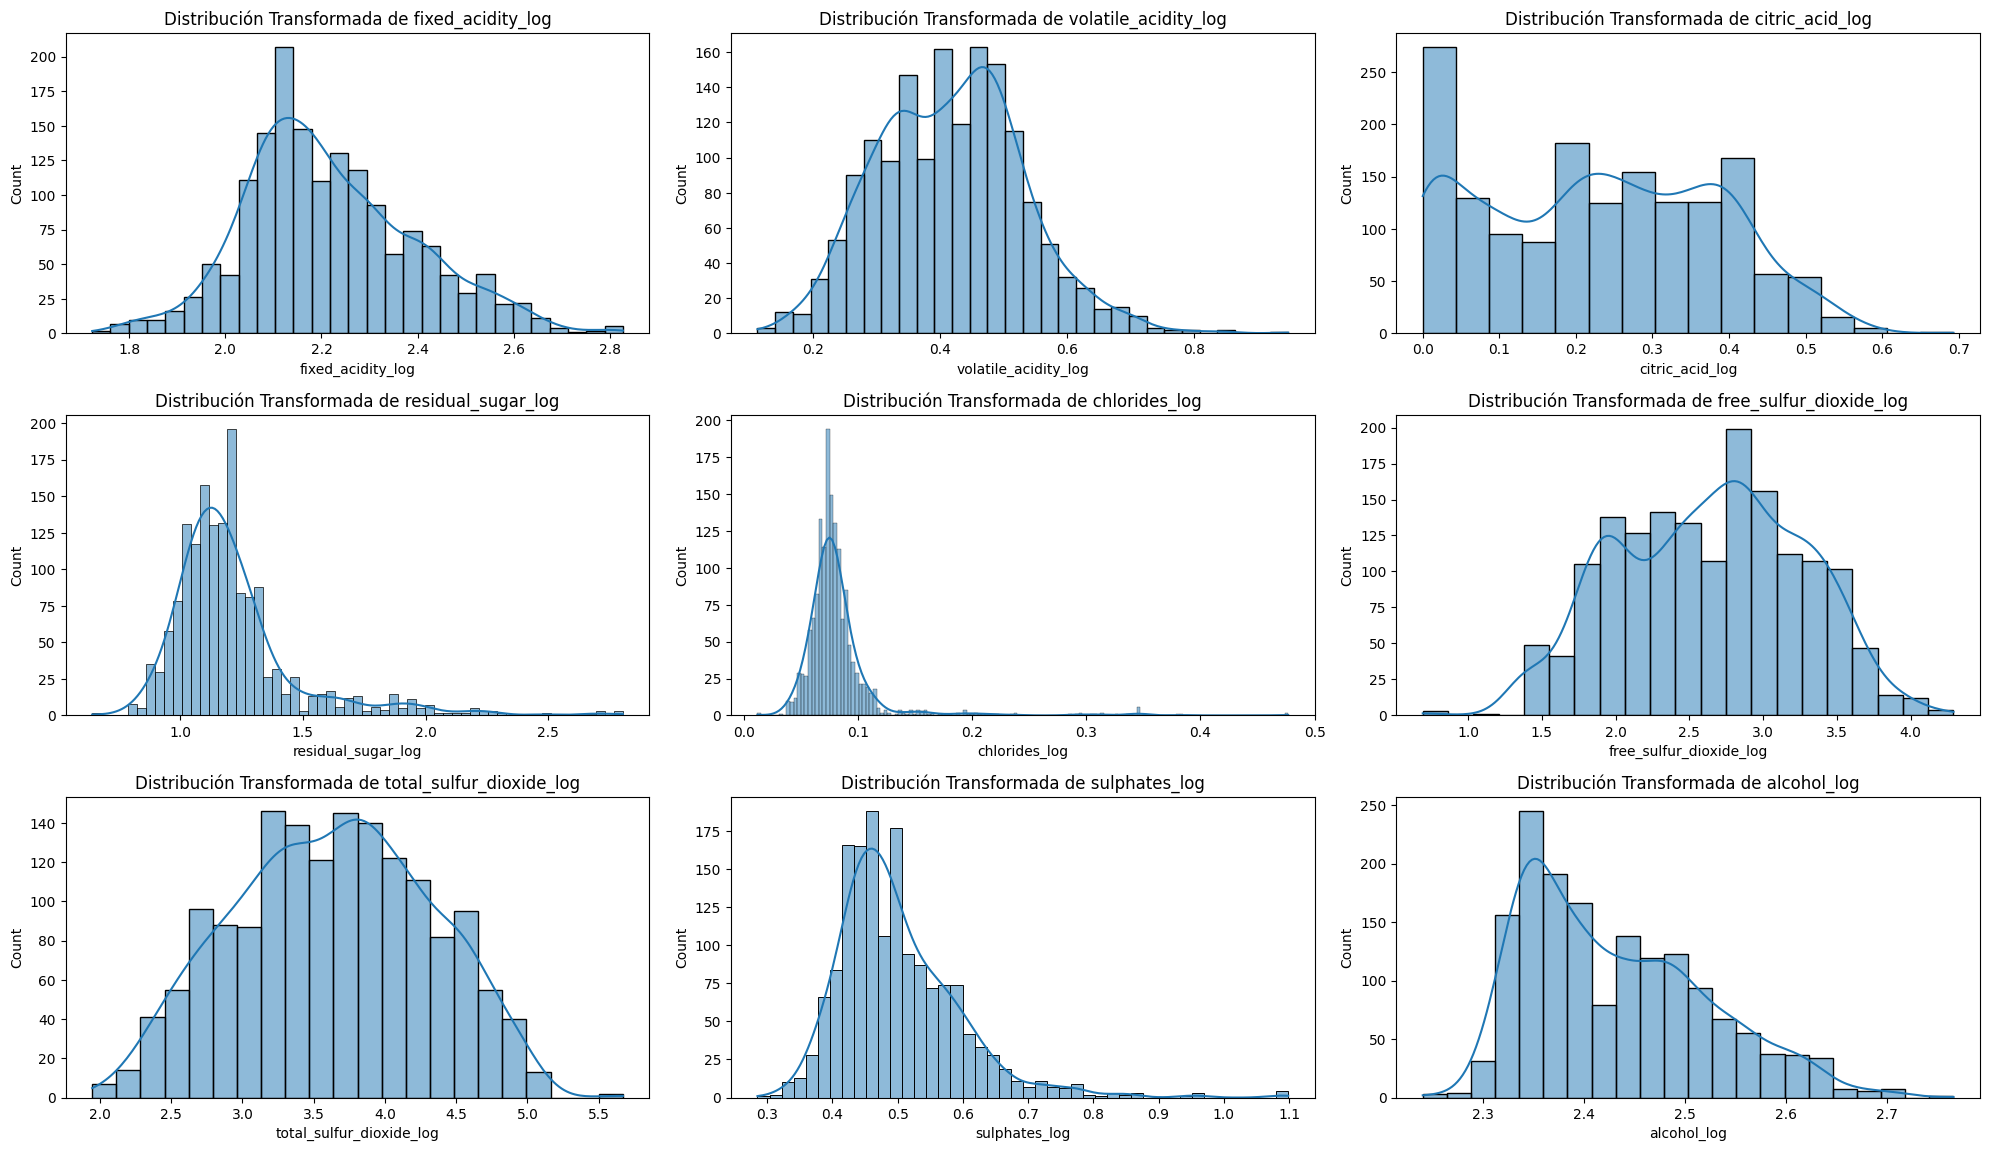

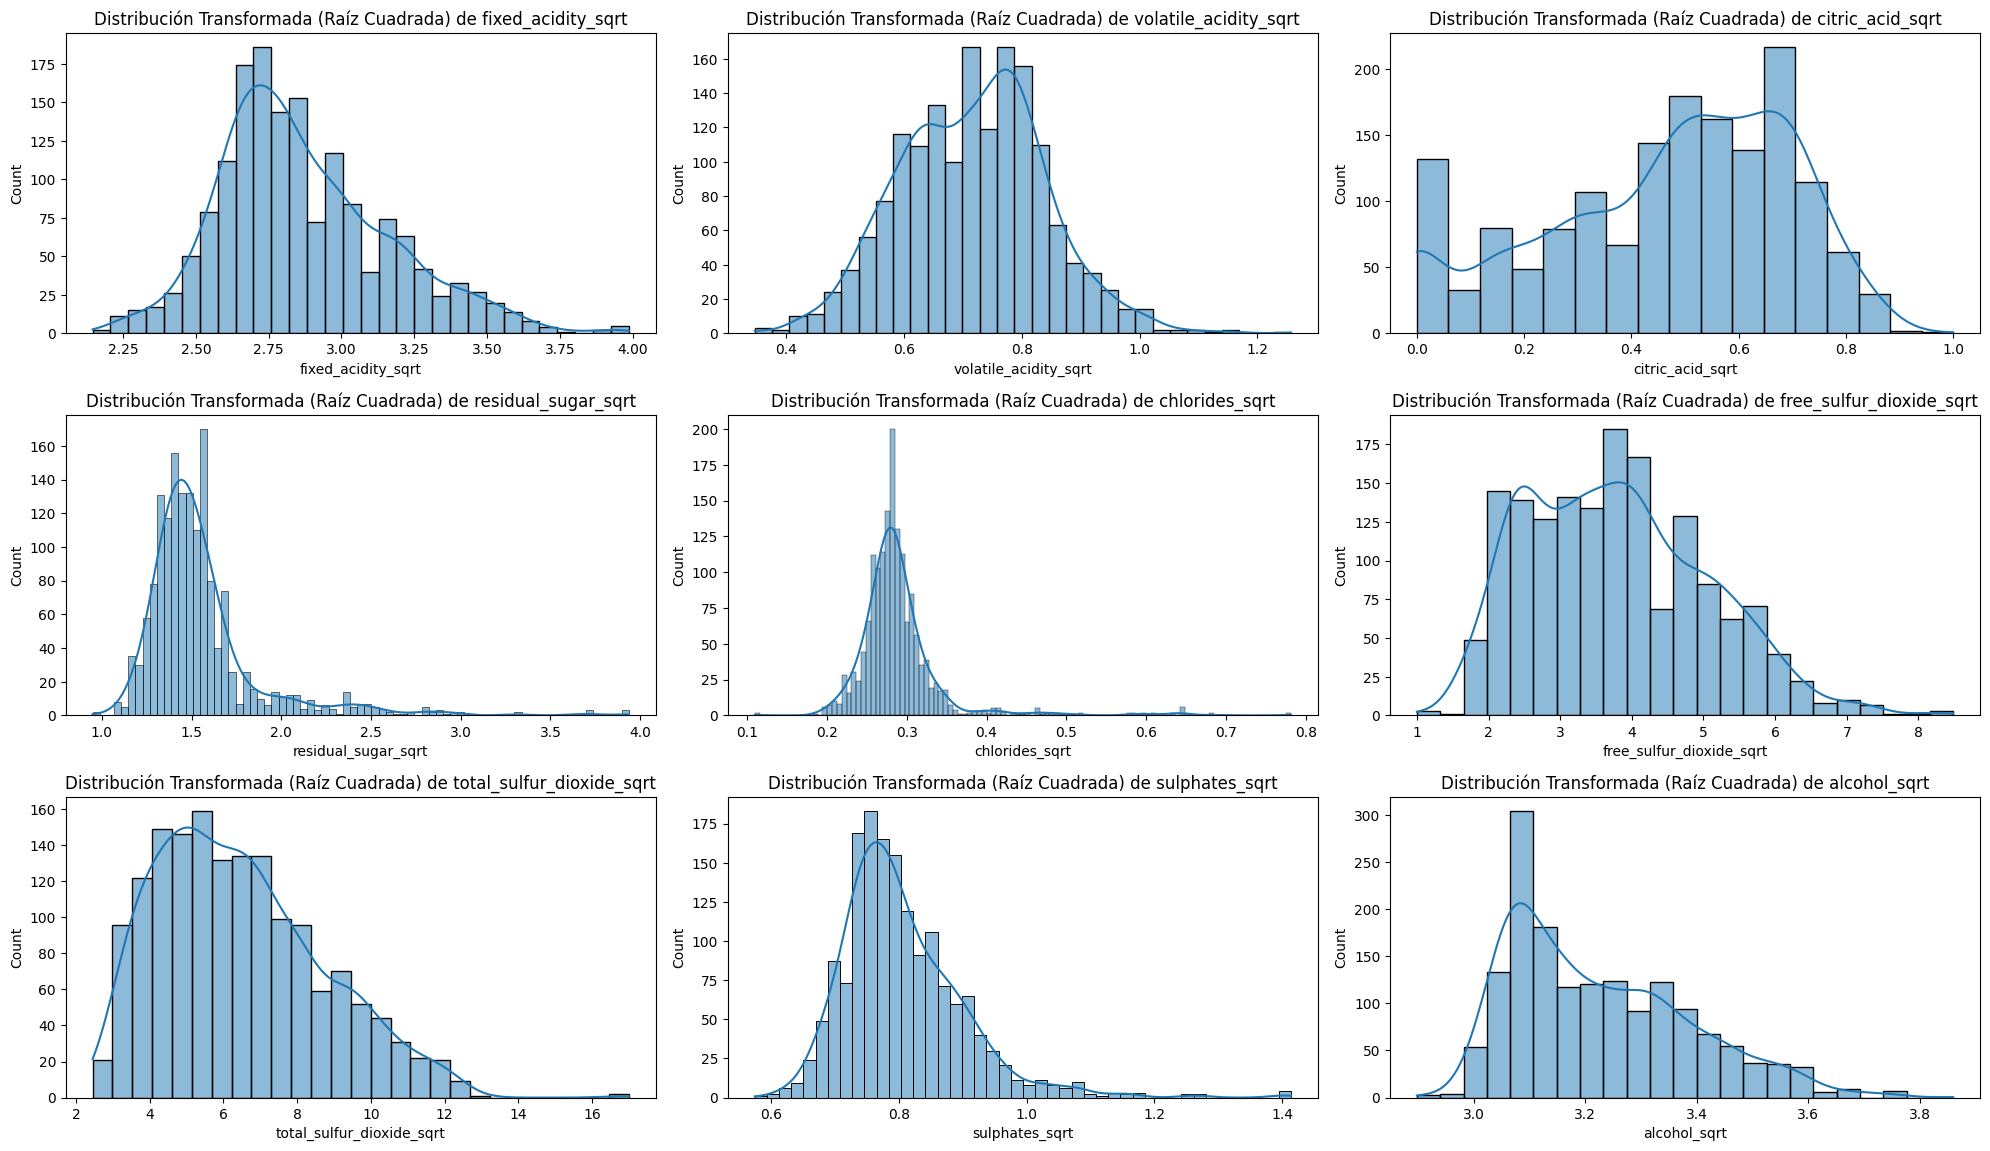

In [256]:
# Visualizar las distribuciones transformadas
log_features = [
    'fixed_acidity_log', 'volatile_acidity_log', 'citric_acid_log', 'residual_sugar_log', 'chlorides_log',
    'free_sulfur_dioxide_log', 'total_sulfur_dioxide_log', 'sulphates_log', 'alcohol_log'
]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(log_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(red_wine[feature], kde=True)
    plt.title(f'Distribución Transformada de {feature}')
plt.tight_layout()
plt.show()

# Visualizar las distribuciones transformadas con raíz cuadrada
sqrt_features = [
    'fixed_acidity_sqrt', 'volatile_acidity_sqrt', 'citric_acid_sqrt', 'residual_sugar_sqrt', 'chlorides_sqrt',
    'free_sulfur_dioxide_sqrt', 'total_sulfur_dioxide_sqrt', 'sulphates_sqrt', 'alcohol_sqrt'
]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(sqrt_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(red_wine[feature], kde=True)
    plt.title(f'Distribución Transformada (Raíz Cuadrada) de {feature}')
plt.tight_layout()
plt.show()

#### Como se observa anteriormente la transformacion logaritmica realiza un mejor trabajo suavizando las pendientes o hasta eliminando la cantidad de subcampanas

In [257]:
# Seleccionar las variables que no fueron modificadas
unchanged_features = [
    'density', 'pH', 'quality'  # Aquí se incluyen las variables que no se transformaron
]
# Crear un nuevo DataFrame con las variables transformadas y las no modificadas
combined_data_red = red_wine[unchanged_features + log_features]
combined_data_red['quality'].head()
combined_data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   density                   1599 non-null   float64
 1   pH                        1599 non-null   float64
 2   quality                   1599 non-null   int64  
 3   fixed_acidity_log         1599 non-null   float64
 4   volatile_acidity_log      1599 non-null   float64
 5   citric_acid_log           1599 non-null   float64
 6   residual_sugar_log        1599 non-null   float64
 7   chlorides_log             1599 non-null   float64
 8   free_sulfur_dioxide_log   1599 non-null   float64
 9   total_sulfur_dioxide_log  1599 non-null   float64
 10  sulphates_log             1599 non-null   float64
 11  alcohol_log               1599 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### Para eliminar el sesgo de variables del vino blanco, que tienen algunas variables se usaran transformaciones como la logaritmica o cuadraticas, para atenuar y llegar a la normal

In [258]:
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [259]:
# Cargar dataset
# Aplicar transformaciones logarítmicas y de raíz cuadrada
white_wine['fixed_acidity_log'] = np.log1p(white_wine['fixed acidity'])
white_wine['volatile_acidity_log'] = np.log1p(white_wine['volatile acidity'])
white_wine['citric_acid_log'] = np.log1p(white_wine['citric acid'])
white_wine['residual_sugar_log'] = np.log1p(white_wine['residual sugar'])
white_wine['chlorides_log'] = np.log1p(white_wine['chlorides'])
white_wine['free_sulfur_dioxide_log'] = np.log1p(white_wine['free sulfur dioxide'])
white_wine['total_sulfur_dioxide_log'] = np.log1p(white_wine['total sulfur dioxide'])
white_wine['sulphates_log'] = np.log1p(white_wine['sulphates'])
white_wine['alcohol_log'] = np.log1p(white_wine['alcohol'])

white_wine['fixed_acidity_sqrt'] = np.sqrt(white_wine['fixed acidity'])
white_wine['volatile_acidity_sqrt'] = np.sqrt(white_wine['volatile acidity'])
white_wine['citric_acid_sqrt'] = np.sqrt(white_wine['citric acid'])
white_wine['residual_sugar_sqrt'] = np.sqrt(white_wine['residual sugar'])
white_wine['chlorides_sqrt'] = np.sqrt(white_wine['chlorides'])
white_wine['free_sulfur_dioxide_sqrt'] = np.sqrt(white_wine['free sulfur dioxide'])
white_wine['total_sulfur_dioxide_sqrt'] = np.sqrt(white_wine['total sulfur dioxide'])
white_wine['sulphates_sqrt'] = np.sqrt(white_wine['sulphates'])
white_wine['alcohol_sqrt'] = np.sqrt(white_wine['alcohol'])

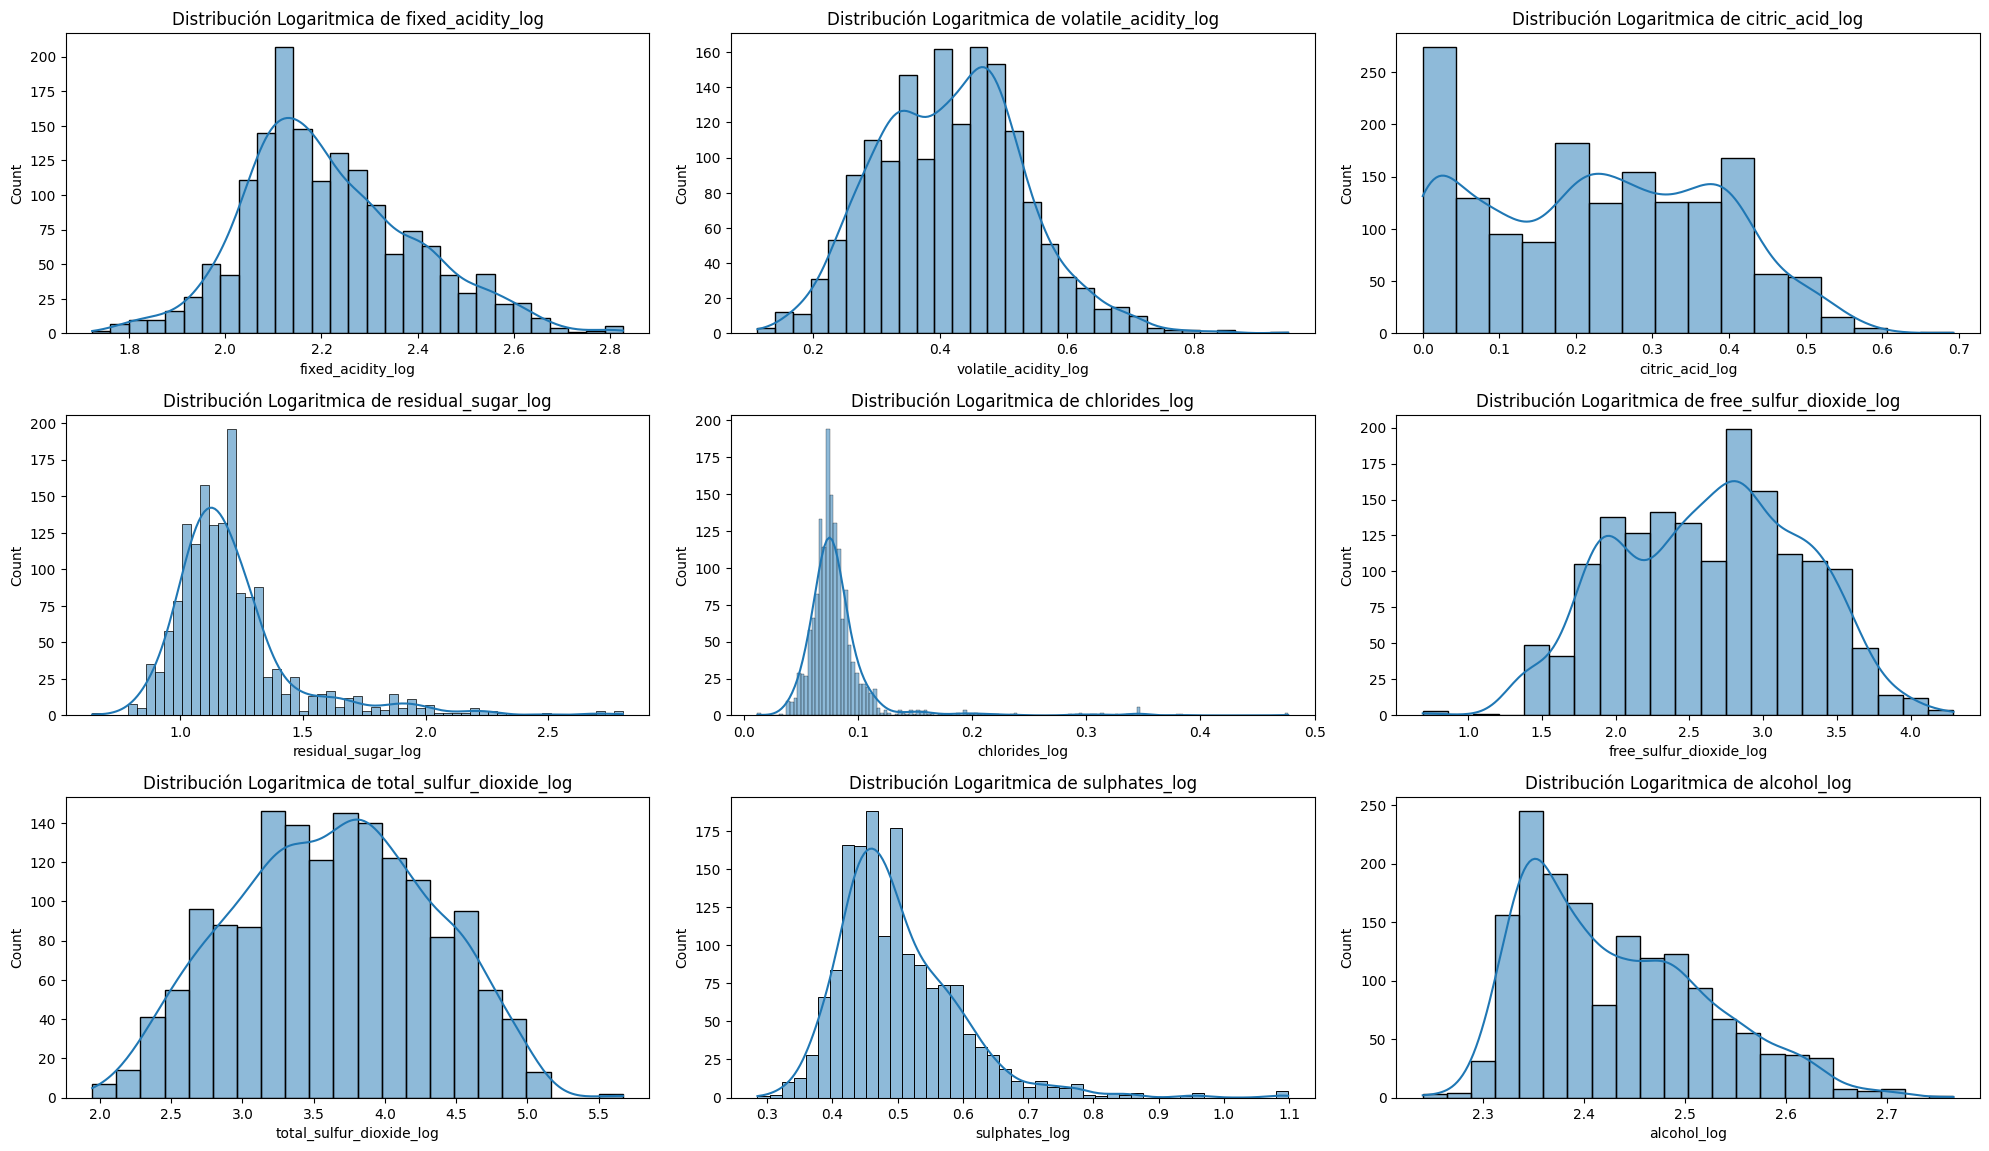

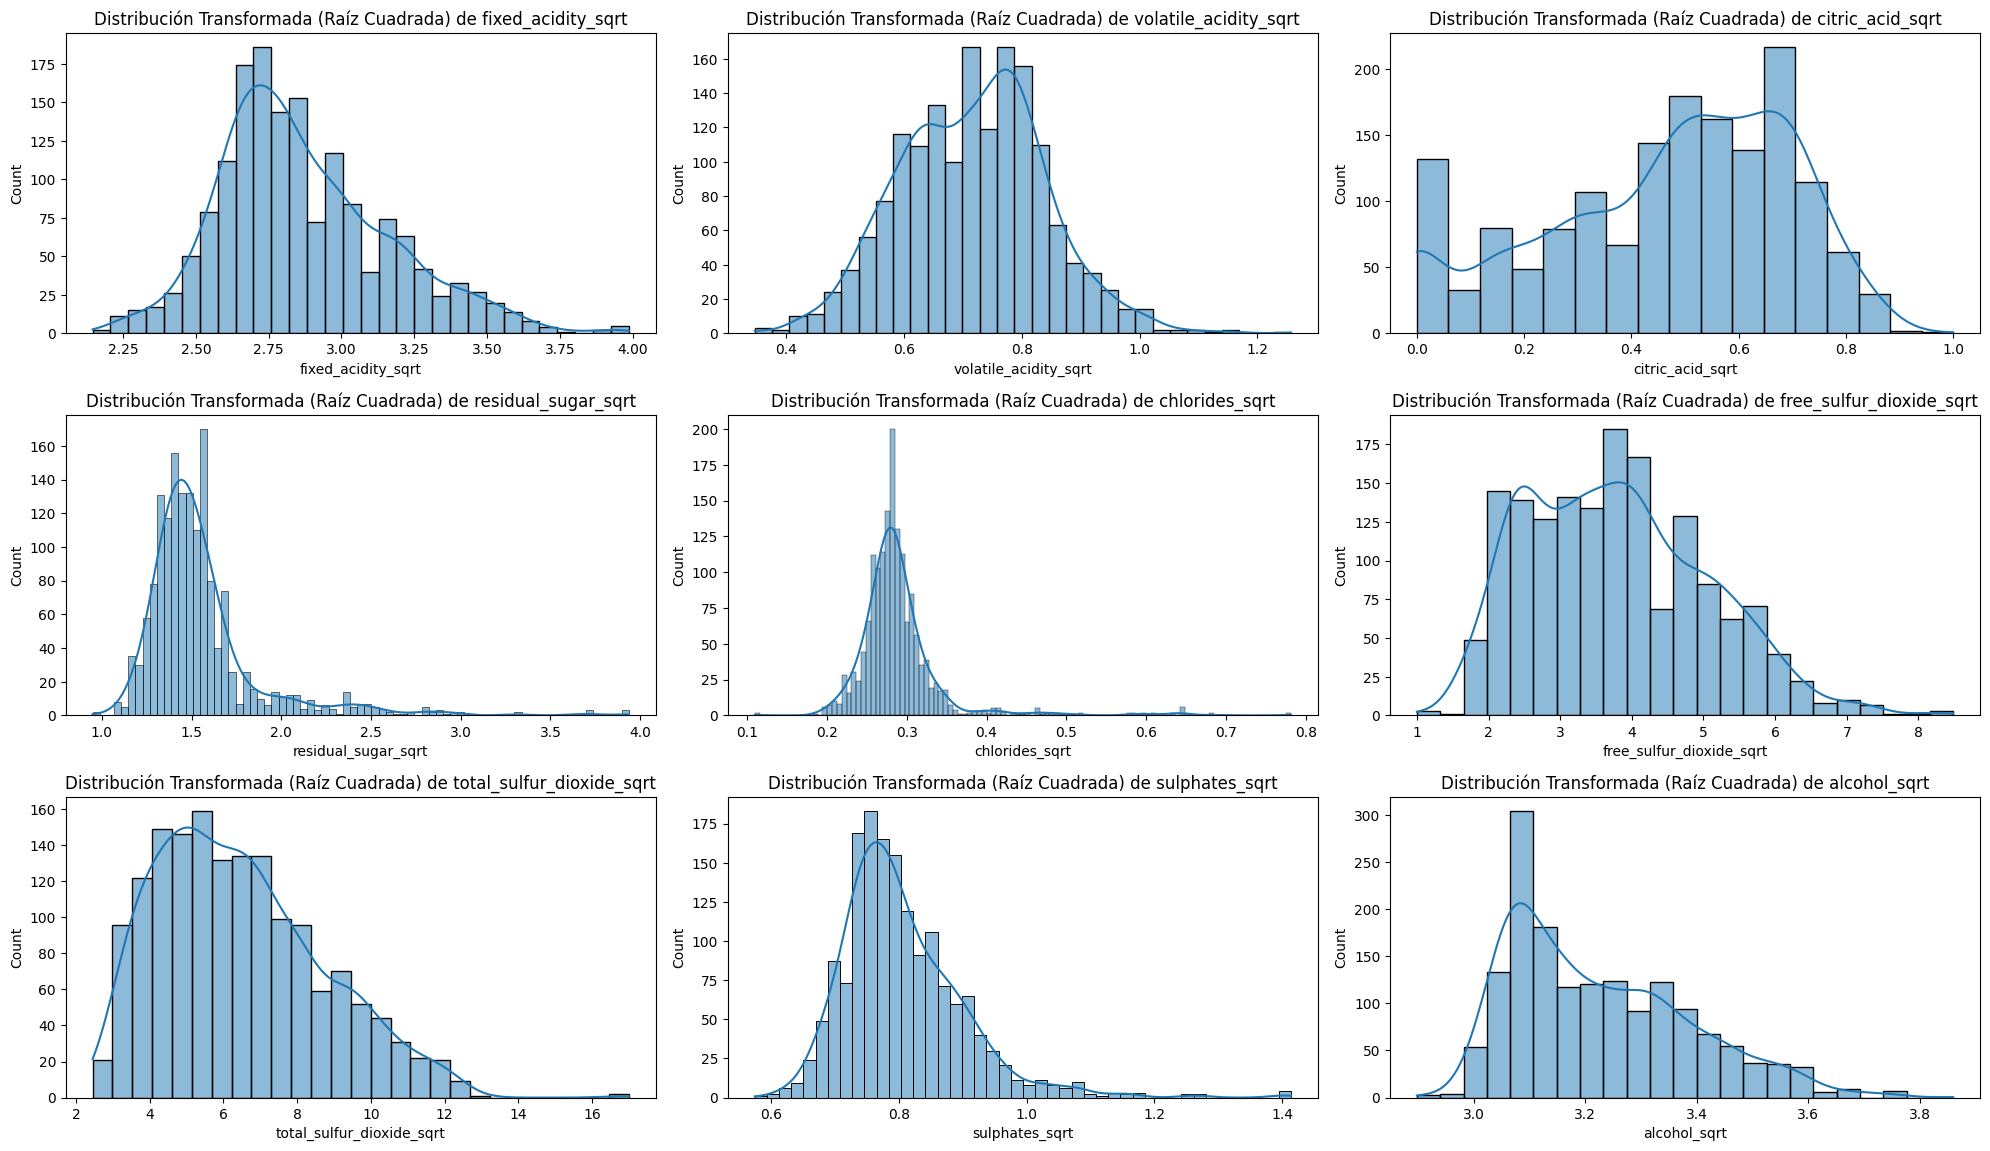

In [260]:
# Variables transformadas
log_features_white = [
    'fixed_acidity_log', 'volatile_acidity_log', 'citric_acid_log', 'residual_sugar_log', 'chlorides_log',
    'free_sulfur_dioxide_log', 'total_sulfur_dioxide_log', 'sulphates_log', 'alcohol_log'
]

# Variables transformadas con raíz cuadrada
sqrt_features_white = [
    'fixed_acidity_sqrt', 'volatile_acidity_sqrt', 'citric_acid_sqrt', 'residual_sugar_sqrt', 'chlorides_sqrt',
    'free_sulfur_dioxide_sqrt', 'total_sulfur_dioxide_sqrt', 'sulphates_sqrt', 'alcohol_sqrt'
]

plt.figure(figsize=(20, 15))

for i, feature in enumerate(log_features_white, 1):
    plt.subplot(4, 3, i)
    sns.histplot(red_wine[feature], kde=True)
    plt.title(f'Distribución Logaritmica de {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, feature in enumerate(sqrt_features_white, 1):
    plt.subplot(4, 3, i)
    sns.histplot(red_wine[feature], kde=True)
    plt.title(f'Distribución Transformada (Raíz Cuadrada) de {feature}')
plt.tight_layout()
plt.show()

#### Como se observa anteriormente la transformacion logaritmica realiza un mejor trabajo suavizando las pendientes o hasta eliminando la cantidad de subcampanas

In [261]:
# Seleccionar las variables que no fueron modificadas
unchanged_features_white = [
    'density', 'pH', 'quality'  # Aquí se incluyen las variables que no se transformaron
]
# Crear un nuevo DataFrame con las variables transformadas y las no modificadas
combined_data_white = white_wine[unchanged_features_white + log_features_white]
combined_data_white['quality'].head()
combined_data_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   density                   4898 non-null   float64
 1   pH                        4898 non-null   float64
 2   quality                   4898 non-null   int64  
 3   fixed_acidity_log         4898 non-null   float64
 4   volatile_acidity_log      4898 non-null   float64
 5   citric_acid_log           4898 non-null   float64
 6   residual_sugar_log        4898 non-null   float64
 7   chlorides_log             4898 non-null   float64
 8   free_sulfur_dioxide_log   4898 non-null   float64
 9   total_sulfur_dioxide_log  4898 non-null   float64
 10  sulphates_log             4898 non-null   float64
 11  alcohol_log               4898 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### AHORA QUE LAS TRANSFORMACIONES Y LIMPIEZA ESTAN DADAS VAMOS A HACER LA TAREA 1 CON DATA TRANSFORMADA Y SIN TRANSFORMAR.

In [262]:
#nota : 0 es rojo y 1 es blanco
# Añadir columna de tipo de vino
red_wine['type'] = 0
white_wine['type'] = 1

# Añadir columna de tipo de vino
combined_data_red['type'] = 0
combined_data_white['type'] = 1


# Combinar datasets
wine_data = pd.concat([red_wine, white_wine], axis=0)
wine_data_transform = pd.concat([combined_data_red, combined_data_white], axis=0)



C:\Users\USER\AppData\Local\Temp\ipykernel_19012\2298009621.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_red['type'] = 0
C:\Users\USER\AppData\Local\Temp\ipykernel_19012\2298009621.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_white['type'] = 1


In [263]:
# Verificar datos combinados
print("Combined Wine Data:\n", wine_data.head())
print("Combined Wine Info:\n", wine_data.info())

Combined Wine Data:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  ...  \
0                 11.0                  34.0   0.9978  3.51       0.56  ...   
1                 25.0                  67.0   0.9968  3.20       0.68  ...   
2                 15.0                  54.0   0.9970  3.26       0.65  ...   
3                 17.0                  60.0   0.9980  3.16       0.58  ...   
4                 11.0                  34.0   0.9978  3.51       0.56  ...   

   fixed_acidity_sqrt  volatile_aci

In [264]:
# Verificar datos combinados
print("Combined Wine Data:\n", wine_data_transform.head())
print("Combined Wine Info:\n", wine_data_transform.info())

Combined Wine Data:
    density    pH  quality  fixed_acidity_log  volatile_acidity_log  \
0   0.9978  3.51        5           2.128232              0.530628   
1   0.9968  3.20        5           2.174752              0.631272   
2   0.9970  3.26        5           2.174752              0.565314   
3   0.9980  3.16        6           2.501436              0.246860   
4   0.9978  3.51        5           2.128232              0.530628   

   citric_acid_log  residual_sugar_log  chlorides_log  \
0         0.000000            1.064711       0.073250   
1         0.000000            1.280934       0.093490   
2         0.039221            1.193922       0.088011   
3         0.444686            1.064711       0.072321   
4         0.000000            1.064711       0.073250   

   free_sulfur_dioxide_log  total_sulfur_dioxide_log  sulphates_log  \
0                 2.484907                  3.555348       0.444686   
1                 3.258097                  4.219508       0.518794   
2 

#### PARA DATOS SIN TRANSFORMAR ARBOLES DE DECISION Y RAMDON FOREST

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separar características y etiqueta
X = wine_data.drop(['quality', 'type'], axis=1)
y = wine_data['type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluar modelo de árbol de decisión
print("Accuracy del Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print("Reporte de clasificación del Árbol de Decisión:\n", classification_report(y_test, y_pred_tree))

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluar modelo Random Forest
print("Accuracy del Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Reporte de clasificación del Random Forest:\n", classification_report(y_test, y_pred_rf))

Accuracy del Árbol de Decisión: 0.98
Reporte de clasificación del Árbol de Decisión:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       341
           1       0.98      0.99      0.99       959

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.97      1300
weighted avg       0.98      0.98      0.98      1300

Accuracy del Random Forest: 0.9923076923076923
Reporte de clasificación del Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       341
           1       0.99      1.00      0.99       959

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



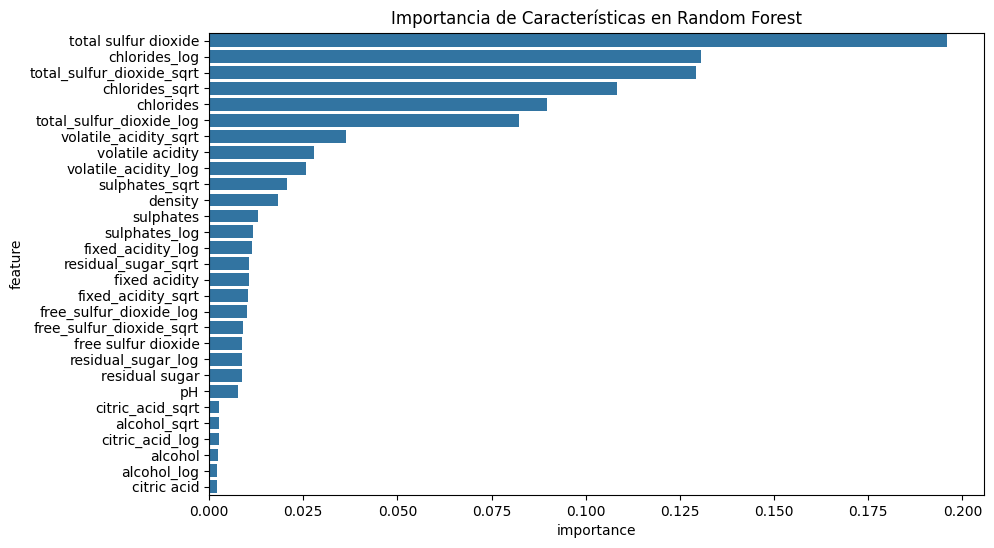

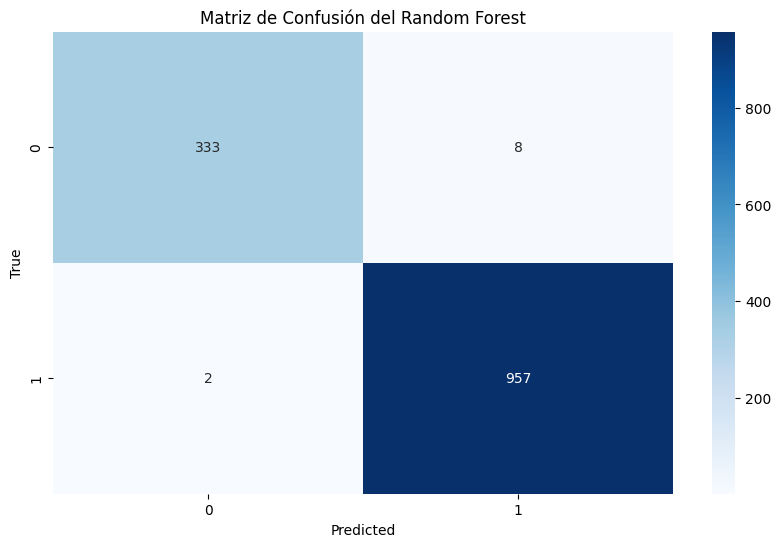

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Importancia de características para Random Forest
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Gráfica de barras de importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importancia de Características en Random Forest')
plt.show()


cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión del Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### PARA DATOS TRANSFORMADOS

In [267]:
# Separar características y etiqueta
X1 = wine_data_transform.drop(['quality', 'type'], axis=1) ### Se borra calidad debido a que es una variable colocada sesgadamente por catadores
y1 = wine_data_transform['type']

# Dividir en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Entrenar modelo de árbol de decisión
tree_model1 = DecisionTreeClassifier(random_state=42)
tree_model1.fit(X_train1, y_train1)
y_pred_tree1 = tree_model1.predict(X_test1)

# Evaluar modelo de árbol de decisión
print("Accuracy del Árbol de Decisión:", accuracy_score(y_test1, y_pred_tree1))
print("Reporte de clasificación del Árbol de Decisión:\n", classification_report(y_test1, y_pred_tree1))

# Entrenar modelo Random Forest
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model1.fit(X_train1, y_train1)
y_pred_rf1 = rf_model1.predict(X_test1)

# Evaluar modelo Random Forest
print("Accuracy del Random Forest:", accuracy_score(y_test1, y_pred_rf1))
print("Reporte de clasificación del Random Forest:\n", classification_report(y_test1, y_pred_rf1))

Accuracy del Árbol de Decisión: 0.9815384615384616
Reporte de clasificación del Árbol de Decisión:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       341
           1       0.99      0.99      0.99       959

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300

Accuracy del Random Forest: 0.9946153846153846
Reporte de clasificación del Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       341
           1       0.99      1.00      1.00       959

    accuracy                           0.99      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



#### OTROS ALGORITMOS DE CLASIFICACION SIN DATOS TRANSFORMADOS

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Función para entrenar y evaluar modelos
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, report, cm

# Modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', random_state=42),
}

accuracies_no_transform = []
# Entrenar y evaluar modelos
print("Resultados de Clasificación del Vino (Tinto o Blanco):")
for name, model in models.items():
    accuracy, report, cm = train_evaluate_model(model, X_train, y_train, X_test, y_test)
    accuracies_no_transform.append(accuracy)
    print(f"\n{name}:\nAccuracy: {accuracy}\n")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{cm}")

Resultados de Clasificación del Vino (Tinto o Blanco):


c:\Users\USER\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
Accuracy: 0.9815384615384616

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       341
           1       0.98      0.99      0.99       959

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.98      1300
weighted avg       0.98      0.98      0.98      1300

Confusion Matrix:
[[324  17]
 [  7 952]]

SVM:
Accuracy: 0.9869230769230769

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       341
           1       0.99      0.99      0.99       959

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300

Confusion Matrix:
[[329  12]
 [  5 954]]


#### PARA DATOS TRANSFORMADOS

In [269]:
accuracies_transform = []
# Entrenar y evaluar modelos
print("Resultados de Clasificación del Vino (Tinto o Blanco):")
for name, model in models.items():
    accuracy, report, cm = train_evaluate_model(model, X_train1, y_train1, X_test1, y_test1)
    accuracies_transform.append(accuracy)
    print(f"\n{name}:\nAccuracy: {accuracy}\n")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{cm}")
    

Resultados de Clasificación del Vino (Tinto o Blanco):

Logistic Regression:
Accuracy: 0.9723076923076923

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       341
           1       0.97      0.99      0.98       959

    accuracy                           0.97      1300
   macro avg       0.97      0.95      0.96      1300
weighted avg       0.97      0.97      0.97      1300

Confusion Matrix:
[[313  28]
 [  8 951]]

SVM:
Accuracy: 0.9823076923076923

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       341
           1       0.99      0.99      0.99       959

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.98      1300
weighted avg       0.98      0.98      0.98      1300

Confusion Matrix:
[[327  14]
 [  9 950]]


#### USANDO REDES NEURONALES PARA DATOS SIN TRANSFORMAR

In [270]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo
model = Sequential()

# Añadir capas, como se trata de un modelo de clasificacion simple y con altos 
# resultados con modelos menos complejos, no se optara por usar otras redes neuronales como 
# Dropout, batch normalization, etc.
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(1, activation='sigmoid'))  # Capa de salida

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

c:\Users\USER\miniconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
163/163 - 2s - 15ms/step - accuracy: 0.9271 - loss: 0.2126 - val_accuracy: 0.9323 - val_loss: 0.2072
Epoch 2/50
163/163 - 0s - 3ms/step - accuracy: 0.9419 - loss: 0.1642 - val_accuracy: 0.9377 - val_loss: 0.1873
Epoch 3/50
163/163 - 0s - 3ms/step - accuracy: 0.9513 - loss: 0.1391 - val_accuracy: 0.9400 - val_loss: 0.1646
Epoch 4/50
163/163 - 0s - 3ms/step - accuracy: 0.9617 - loss: 0.1138 - val_accuracy: 0.9500 - val_loss: 0.1475
Epoch 5/50
163/163 - 0s - 3ms/step - accuracy: 0.9694 - loss: 0.0975 - val_accuracy: 0.9669 - val_loss: 0.1133
Epoch 6/50
163/163 - 0s - 3ms/step - accuracy: 0.9721 - loss: 0.0889 - val_accuracy: 0.9662 - val_loss: 0.1105
Epoch 7/50
163/163 - 0s - 3ms/step - accuracy: 0.9754 - loss: 0.0801 - val_accuracy: 0.9738 - val_loss: 0.0992
Epoch 8/50
163/163 - 0s - 3ms/step - accuracy: 0.9744 - loss: 0.0759 - val_accuracy: 0.9731 - val_loss: 0.0991
Epoch 9/50
163/163 - 0s - 3ms/step - accuracy: 0.9769 - loss: 0.0698 - val_accuracy: 0.9738 - val_loss: 0.0986


In [271]:
# Evaluar el modelo
loss, accuracy_no_transformado = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy_no_transformado}')

# Realizar predicciones
y_pred = (model.predict(X_test) > 0.5).astype("int32") ## Como es clasificacion binaria el umbral es 0.5

# Generar reporte de clasificación y matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9696 - loss: 0.0818
Accuracy: 0.9784615635871887
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       341
           1       0.98      1.00      0.99       959

    accuracy                           0.98      1300
   macro avg       0.98      0.96      0.97      1300
weighted avg       0.98      0.98      0.98      1300

Confusion Matrix:
 [[317  24]
 [  4 955]]


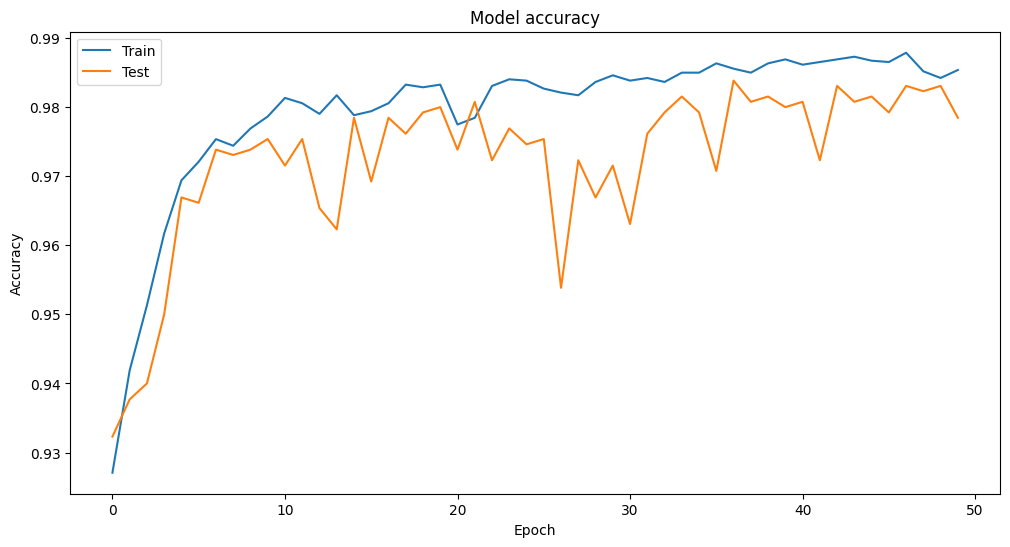

In [272]:
# Graficamos la evolucion del modelo en las epocas accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

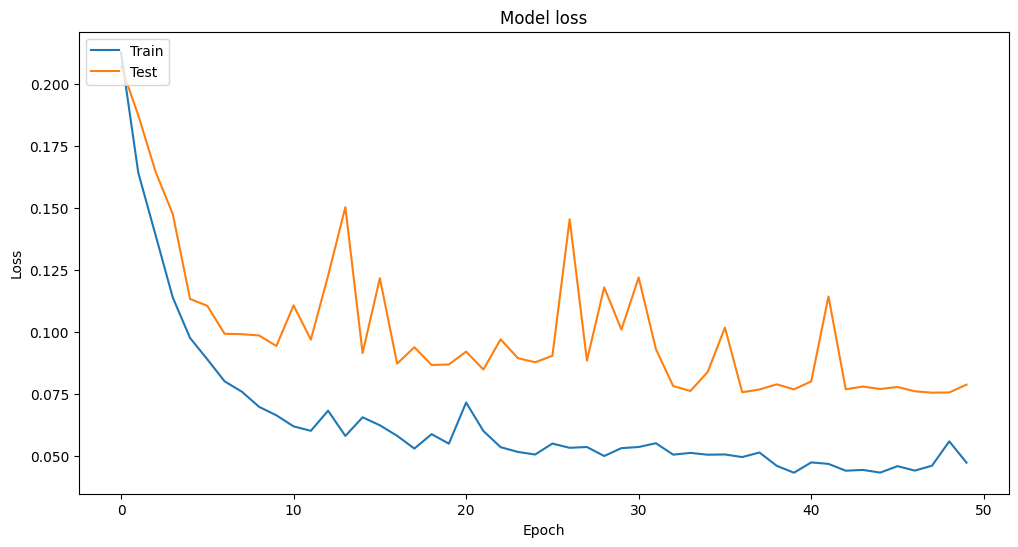

In [273]:
# Graficamos la evolucion del modelo en las epocas Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### REDES NEURONALES PARA DATOS TRANSFORMADOS

In [274]:
# Crear el modelo
model = Sequential()

# Añadir capas, como se trata de un modelo de clasificacion simple y con altos 
# resultados con modelos menos complejos, no se optara por usar otras redes neuronales como 
# Dropout, batch normalization, etc.
model.add(Dense(64, input_dim=X_train1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(1, activation='sigmoid'))  # Capa de salida

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_data=(X_test1, y_test1), verbose=2)

Epoch 1/50


c:\Users\USER\miniconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 - 2s - 14ms/step - accuracy: 0.8378 - loss: 0.3537 - val_accuracy: 0.9192 - val_loss: 0.2272
Epoch 2/50
163/163 - 0s - 3ms/step - accuracy: 0.9471 - loss: 0.1586 - val_accuracy: 0.9546 - val_loss: 0.1419
Epoch 3/50
163/163 - 0s - 3ms/step - accuracy: 0.9632 - loss: 0.1070 - val_accuracy: 0.9600 - val_loss: 0.1159
Epoch 4/50
163/163 - 0s - 3ms/step - accuracy: 0.9709 - loss: 0.0848 - val_accuracy: 0.9646 - val_loss: 0.0967
Epoch 5/50
163/163 - 0s - 3ms/step - accuracy: 0.9788 - loss: 0.0702 - val_accuracy: 0.9715 - val_loss: 0.0879
Epoch 6/50
163/163 - 0s - 3ms/step - accuracy: 0.9808 - loss: 0.0617 - val_accuracy: 0.9738 - val_loss: 0.0957
Epoch 7/50
163/163 - 0s - 3ms/step - accuracy: 0.9819 - loss: 0.0580 - val_accuracy: 0.9715 - val_loss: 0.0811
Epoch 8/50
163/163 - 0s - 3ms/step - accuracy: 0.9829 - loss: 0.0544 - val_accuracy: 0.9777 - val_loss: 0.0778
Epoch 9/50
163/163 - 0s - 2ms/step - accuracy: 0.9846 - loss: 0.0506 - val_accuracy: 0.9762 - val_loss: 0.0843
Epoch 10/50

In [275]:
# Evaluar el modelo
loss, accuracy_transformado = model.evaluate(X_test1, y_test1)
print(f'Accuracy: {accuracy_transformado}')

# Realizar predicciones
y_pred1 = (model.predict(X_test1) > 0.5).astype("int32") ## Como es clasificacion binaria el umbral es 0.5

# Generar reporte de clasificación y matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test1, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred1))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9861 - loss: 0.0513
Accuracy: 0.9884615540504456
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       341
           1       0.99      0.99      0.99       959

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300

Confusion Matrix:
 [[331  10]
 [  5 954]]


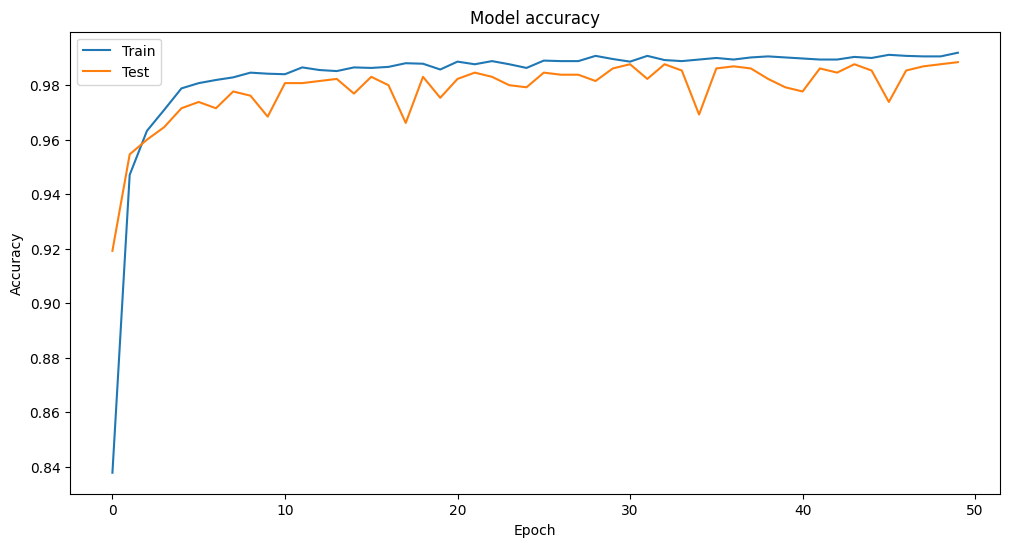

In [276]:
# Graficamos la evolucion del modelo en las epocas accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

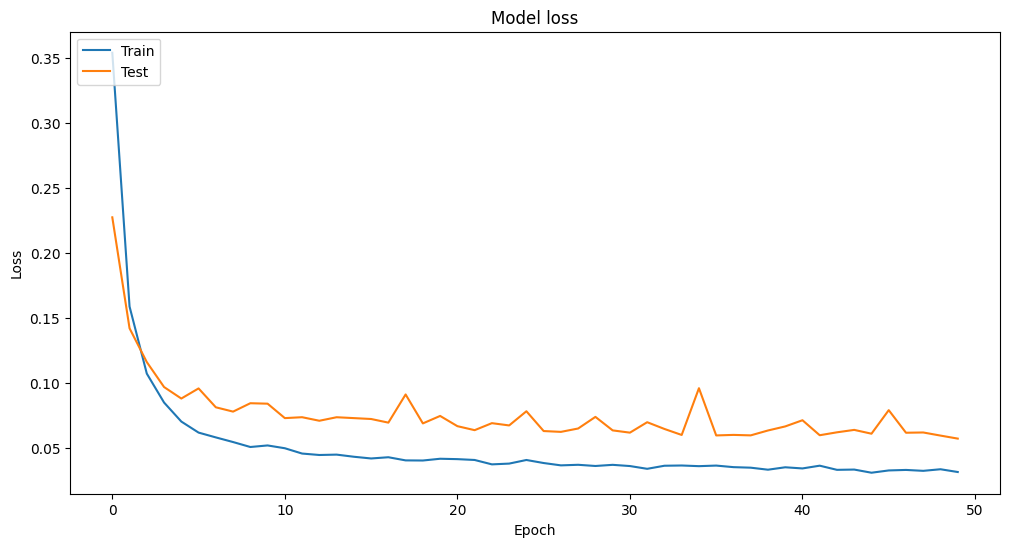

In [277]:
# Graficamos la evolucion del modelo en las epocas Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### EN EL CUADRO SE PRESENTA EL RESUMEN DE LOS MODELOS UTILIZADOS Y SI FUERON ENTRENADOS CON VALORES TRANSFORMADOS O NO. EN ALGUNOS CASOS LA TRANSFORMACION RESULTA BENEFICIOSA, EN OTRAS PERJUDICIAL. ESTO SE PUEDE DEBER A RAZONES COMO LA SOBRE ABSTRACCION DE DATOS EN MODELOS QUE NO REQUIEREN MUCHA COMPLEJIDAD O NECESITAN REPRESENTACION DE DATOS ADECUADA.

##### El mejor modelo evaluado es el Ramdon Forest. Si bien esto no es 100% seguro ya que deberiamos jugar con los hiperparametros de los otros modelos. Tales com aumentar, reducir, las capas neuronales y demas.

In [278]:
# Cuadro resumen
results = {
    'Modelo': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'Red Neuronal'],
    'Accuracy (No Transformado)': [accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_rf)
, accuracies_no_transform[0], accuracies_no_transform[1], accuracy_no_transformado],
    'Accuracy (Transformado)': [accuracy_score(y_test1, y_pred_tree1)
, accuracy_score(y_test1, y_pred_rf1)
, accuracies_transform[0], accuracies_transform[1], accuracy_transformado],
}
df_results = pd.DataFrame(results)
df_results


,Modelo,Accuracy (No Transformado),Accuracy (Transformado)
0,Decision Tree,0.980000,0.981538
1,Random Forest,0.992308,0.994615
2,Logistic Regression,0.981538,0.972308
3,SVM,0.986923,0.982308
4,Red Neuronal,0.978462,0.988462


#### AHORA REALIZAMOS LA TAREA 2: La de predecir la calidad.